<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Network analysis

---

<a id="learning-objectives"></a>
### Learning Objectives

- Understand what a graph is
- Describe a graph through its edge list and adjacency matrix
- Distinguish different types of graphs
- Extract the most common measures of graph characteristics with `networkx`
- Get a first insight into network related questions like ranking, robustness and community detection

## Lesson Guide

- [Some examples](#some-examples)
- [Introduction](#introduction)
- [Graphs](#graphs)
    - [Undirected graphs](#undirected-graphs)
    - [Edge list and adjacency matrix](#edges)
    - [Node degree](#degree)
    - [Clustering coefficient](#clustering-coefficient)
    - [Shortest path](#shortest-path)
    - [Directed graphs](#directed-graphs)
    - [Weighted graphs](#weighted-graphs)
    - [Bipartite graphs](#bipartite-graphs)
- [Connected components](#connected-components)
- [Centrality measures](#centrality)
    - [Betweenness centrality](#betweenness)
- [Robustness](#robustness)
    - [Breaking the giant component](#breaking-giant-component)
    - [Breaking the graph randomly](#breaking-randomly)
    - [Averaging the random result](#averaging-random-breaking)
    - [Breaking with betweenness centrality](#breaking-betweenness)
- [Community detection](#community-detection)
    - [The Girvan-Newman algorithm](#Girvan-Newman)
    - [Hierarchical clustering](#hierarchical-clustering)
- [Conclusions](#conclusions)
- [Additional Resources](#resources)
- [Network data resources](#data-resources)

<a id="some-examples"></a>
## Some examples:

#### A transport network:

<img src="./assets/images/tube_map.gif" style="width:500px;height:400px;">

From [TFL](http://content.tfl.gov.uk/standard-tube-map.pdf).

#### The internet:

<img src="http://www.nature.com/nature/journal/v406/n6794/images/406353aa.2.jpg" style="width:500px;height:400px;">

from 
[Yuhai Tu, How robust is the Internet?,
Nature 406, 353-354 (27 July 2000)
doi:10.1038/35019222](http://www.nature.com/nature/journal/v406/n6794/full/406353a0.html)

#### The flavour network:

<img src="http://www.nature.com/article-assets/npg/srep/2011/111215/srep00196/images/w926/srep00196-f2.jpg" style="width:500px;height:400px;">

From 
[Yong-Yeol Ahn, Sebastian E. Ahnert, James P. Bagrow & Albert-László Barabási, Flavor network and the principles of food pairing, Scientific Reports 1, Article number: 196 (2011)
doi:10.1038/srep00196](https://www.nature.com/articles/srep00196)

<a id="introduction"></a>
## Introduction

Networks are met in many different contexts familiar to all of us. We all have a network of friends, use transportation networks, electricity distributed through a power grid, and the internet, there are trade networks between countries, and networks between customers and purchased products. In these networks, nodes are connected by links. The science of networks helps to understand these structures. 

An essential ingredient is the branch of mathematics called graph theory. Graphs are the abstract objects through which a network can be classified and described. Completely different networks might be described by graphs with very similar properties, and in this way graph theory helps to explain objects and their relations in a common framework. Extracting information about the relations between datapoints can add valuable information to models.

<a id="graphs"></a>
## Graphs

A graph $G=(V,E)$ is defined by 

* a set $V$ of **nodes** (also called **vertices**) and 
* a set $E$ of **links** (also called **edges**) indicating which node is connected to which node. 

There are many different types of graphs:
* Links can be with and without a **direction** (for example if Alice is married to Bob, also Bob is married to Alice, whereas if Bob lends money to Charlie the relation has a direction). 
* Links can just indicate that there is a connection, but they can also carry different values indicating a **weight**, for example how strong a friendship is (e.g. how often two friends are going out together) or how much electricity flows through a cable.
* Nodes can belong to different groups. Sometimes there will only be links between nodes from different groups, but not among nodes from the same group (**bipartite network**), for example customers and purchased products or actors and movies where they appeared.

Graph objects can be created, explored and drawn with the Python package [networkx](http://networkx.readthedocs.io/en/stable/#).

We will need the following libraries:

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

<a id="undirected-graphs"></a>
## Undirected graphs

Let us create some simple undirected graphs. 
For example the complete graph where each node is connected to each other node. 

- If we plot this graph for ten nodes, how many links are there?

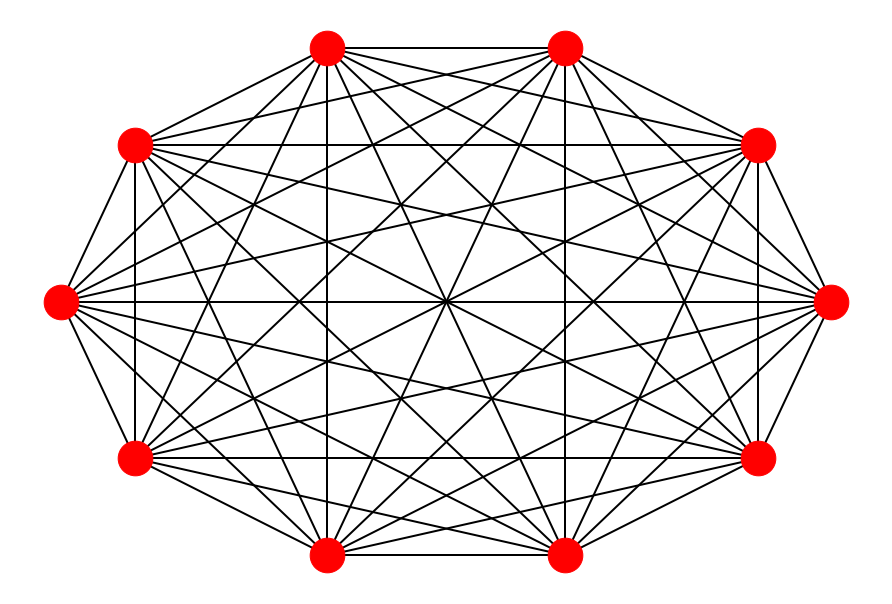

In [2]:
G = nx.complete_graph(10)
nx.draw_circular(G)

The complete graph contains many **loops**, so that it is possible to start at a node, follow the links and return to the original node without traversing any link twice.

Graphs which do not contain any loops are called **trees**. 

- Where did you meet trees before?

## All possible graphs with at most six nodes

- Can you identify structures you know among these graphs?
- Which graphs are trees?

<img src="./assets/images/atlas.png" style="width:500px;height:400px;">

from [Networkx examples](http://networkx.readthedocs.io/en/stable/examples/graph/atlas.html)

<a id="edgelist"></a>
## Edge list and adjacency matrix

The graph structure can be described by the edge list or by the adjacency matrix. 
- For a graph with $n$ nodes the adjacency matrix is an $n\times n$-matrix with entries if nodes are connected by a link. 
- For an undirected graph the adjacency matrix is symmetric. 
- For the complete graph, all entries except those on the diagonal are equal to one. 
- For real-world networks, the adjacency matrix can be very large. If the number of links is much smaller than the number of nodes, the adjacency matrix is sparse. 

In [59]:
len(G.edges())

7

In [60]:
type(G.edges())

networkx.classes.reportviews.EdgeView

In [3]:
print("Edge list: ")
print(G.edges())

Edge list: 
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [4]:
print("Adjacency matrix: ")
print(nx.adjacency_matrix(G).todense())

Adjacency matrix: 
[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


Let us generate our own graph. This can be done in the following way starting from an empty graph and then adding nodes and edges.

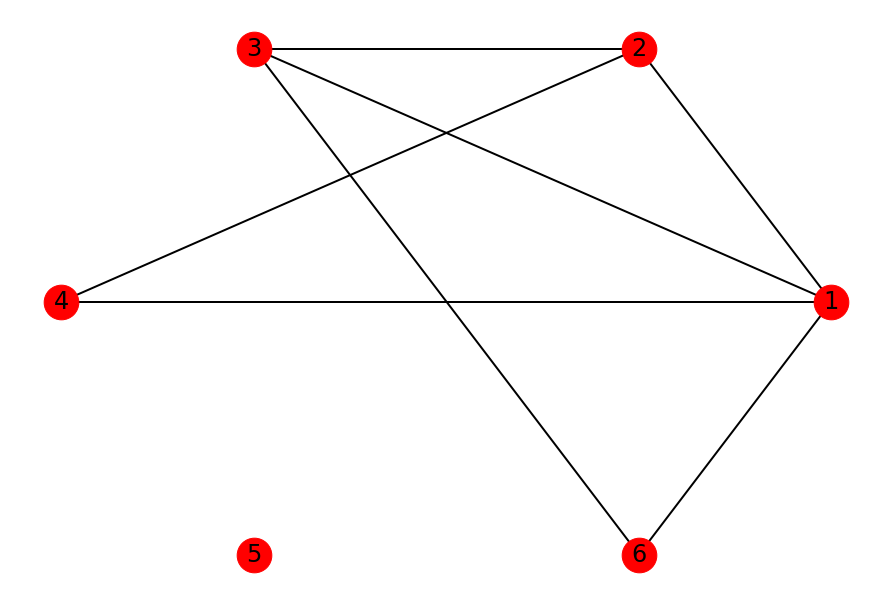

In [5]:
# generate an empty graph
G = nx.Graph()

# define the nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# link the nodes
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 6)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 6)

nx.draw_circular(G, with_labels=True)
plt.show()

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333


In [7]:
print("Adjacency matrix: ")
print(nx.adjacency_matrix(G).todense())

Adjacency matrix: 
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


<a id="degree"></a>
## Node degree

The degree of a node indicates how many links it has. The degree distribution counts the number of nodes with a given degree.

In [8]:
dict(G.degree())

{1: 4, 2: 3, 3: 3, 4: 2, 5: 0, 6: 2}

Number of nodes:  6
Number of edges:  7
Edge list:
 [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)] 

Node degrees
From the adjacency matrix:  [[1.3 2.1 2.1 0.9 0.  1.4]]
Using networkx [(1, 4), (2, 3), (3, 3), (4, 2), (5, 0), (6, 2)]


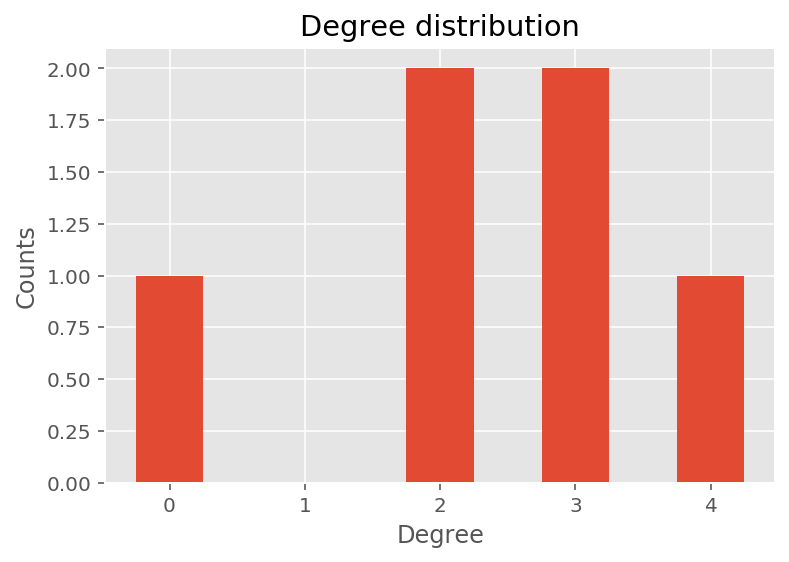

In [61]:
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print("Edge list:\n", G.edges(), "\n")
print("Node degrees")
print("From the adjacency matrix: ", nx.adjacency_matrix(G).sum(axis=0))
print("Using networkx", G.degree())
plt.hist(list(dict(G.degree()).values()),
         bins=np.linspace(0, 5, 6), align='left', rwidth=0.5)
#plt.yticks([0, 1, 2])
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

<a id="clustering-coefficient"></a>
## Clustering coefficient

The neighbours of a given node might be linked to each other, too. For example, two of your friends could be also each other's friends. The ratio between the number of links among neighbours and the number of possible links between them (which is $n(n-1)/2$ for $n$ neighbours) gives the clustering coefficient. It gives the probability that two of your friends are also each other's friends.

In [10]:
print("Clustering coefficients: ")
print(nx.clustering(G))
print("Average clustering coefficient: ")
print(nx.average_clustering(G))

Clustering coefficients: 
{1: 0.5, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 1.0, 5: 0, 6: 1.0}
Average clustering coefficient: 
0.6388888888888888


<a id="shortest-path"></a>
## Shortest path

If two nodes can be reached along a sequence of links, there is a path connecting them. The shortest one of them can be determined by starting at one of the nodes, and then checking if the other node is among the neighbours, second neighbours and so on until it is found. If no such path exists, the path length between the nodes is infinite.

In [11]:
print(nx.shortest_path_length(G, 1, 3))
dict(nx.shortest_path_length(G))

1


{1: {1: 0, 2: 1, 3: 1, 4: 1, 6: 1},
 2: {2: 0, 1: 1, 3: 1, 4: 1, 6: 2},
 3: {3: 0, 1: 1, 2: 1, 6: 1, 4: 2},
 4: {4: 0, 1: 1, 2: 1, 3: 2, 6: 2},
 5: {5: 0},
 6: {6: 0, 1: 1, 3: 1, 2: 2, 4: 2}}

In [12]:
nx.shortest_path(G, 4, 3)

[4, 1, 3]

<a id="directed-graphs"></a>
## Directed graphs

Let us study the same graph, but now giving a direction to the edges. This is done by initialising a DiGraph object, and all added edges will have the direction from the first to the second node argument.

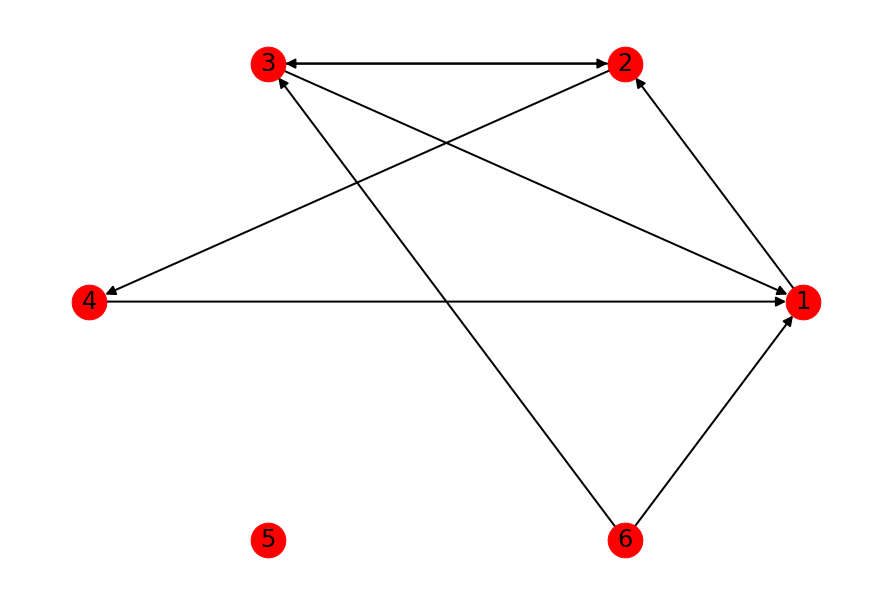

In [13]:
# generate an empty directed graph
G = nx.DiGraph()

# define the nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# link the nodes
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(4, 1)
G.add_edge(6, 1)
G.add_edge(6, 3)

nx.draw_circular(G, arrows=True, with_labels=True)
plt.show()

In [14]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 8
Average in degree:   1.3333
Average out degree:   1.3333


Now the adjacency matrix is not symmetric.

In [15]:
print("Adjacency matrix: ")
print(nx.adjacency_matrix(G).todense())

Adjacency matrix: 
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


Now for each node we can distinguish an **out-degree** (the number of links pointing away from it) and an **in-degree** (the number of links pointing towards it). We can calculate these degrees directly from the adjacency matrix or with the corresponding networkx function.

Number of nodes:  6
Number of edges:  8
Edge list:
 [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)] 

Node degrees
From the adjacency matrix: 
In-degree:
 [[3 2 2 1 0 0]]
Out-degree:
 [[1]
 [2]
 [2]
 [1]
 [0]
 [2]]
Using networkx: 
In-degree:  [(1, 3), (2, 2), (3, 2), (4, 1), (5, 0), (6, 0)]
Out-degree:  [(1, 1), (2, 2), (3, 2), (4, 1), (5, 0), (6, 2)]


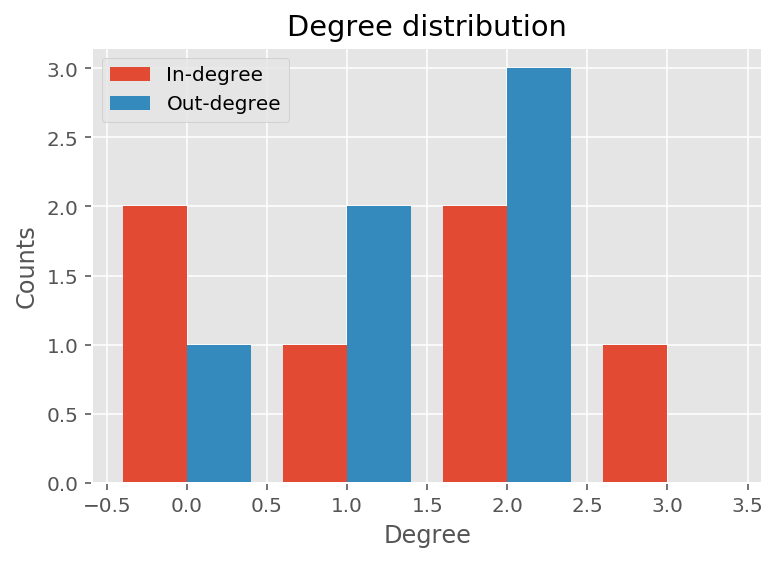

In [16]:
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print("Edge list:\n", G.edges(), "\n")
print("Node degrees")
print("From the adjacency matrix: ")
print("In-degree:\n", nx.adjacency_matrix(G).sum(axis=0))
print("Out-degree:\n", nx.adjacency_matrix(G).sum(axis=1))
nx.adjacency_matrix(G).sum(axis=0)
print("Using networkx: ")
print("In-degree: ", G.in_degree())
print("Out-degree: ", G.out_degree())
plt.hist([list(dict(G.in_degree()).values()), list(dict(G.out_degree()).values())],
         bins=np.linspace(0, 4, 5)-0.5, stacked=False)
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.legend(['In-degree', 'Out-degree'], prop={'size': 10},
           loc='upper left')
plt.title('Degree distribution')
plt.show()

Also the shortest paths are now different from the undirected network and the portion of the graph which can be reached from a given node is smaller.

In [17]:
dict(nx.shortest_path_length(G))

{1: {1: 0, 2: 1, 3: 2, 4: 2},
 2: {2: 0, 3: 1, 4: 1, 1: 2},
 3: {3: 0, 1: 1, 2: 1, 4: 2},
 4: {4: 0, 1: 1, 2: 2, 3: 3},
 5: {5: 0},
 6: {6: 0, 1: 1, 3: 1, 2: 2, 4: 3}}

<a id="weighted-graphs"></a>
## Weighted graphs

Let us use the same undirected graph as before, but now assign a weight to each of the edges. This can be done by adding a weight argument when creating the edges.

In [18]:
# generate an empty graph
G = nx.Graph()

# define the nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# link the nodes
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 3, weight=0.3)
G.add_edge(1, 4, weight=0.1)
G.add_edge(1, 6, weight=0.4)
G.add_edge(2, 3, weight=0.8)
G.add_edge(2, 4, weight=0.8)
G.add_edge(3, 6, weight=1.0)

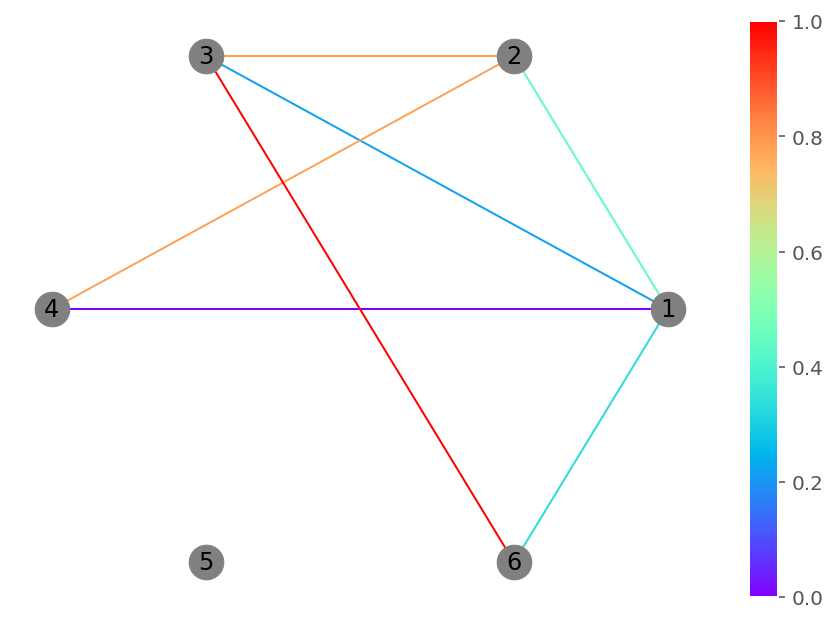

In [19]:
positions = nx.circular_layout(G)
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in G.edges(data=True)]

nx.draw(G, pos=positions, node_color='grey', with_labels=True,
        edge_color=edge_weights, edge_cmap=cmap_edges)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(
    cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

<a id="bipartite-graphs"></a>
## Bipartite graphs

A bipartite graph consists of two groups of nodes. There are links between nodes of differing groups, but no links among nodes from the same group. Common examples are customers and purchased products or meetups and people attending.
Which of the groups a node belongs to can be indicated by the keyword "bipartite" and the corresponding group.

In [20]:
from networkx.algorithms import bipartite

B = nx.Graph()
# Add the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4, 5, 6], bipartite=0)
B.add_nodes_from([7, 8, 9, 10, 11], bipartite=1)
B.add_edges_from([(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9),
                  (4, 10), (5, 9), (5, 11), (6, 11)])

In [21]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 10
Average degree:   1.8182


The graphs, nodes and edges of the two groups of the bipartite graph can easily be extracted. 

In [22]:
bottom_nodes, top_nodes = bipartite.sets(B)
print("First group:", bottom_nodes)
print("Second group:", top_nodes)

First group: {1, 2, 3, 4, 5, 6}
Second group: {7, 8, 9, 10, 11}


To represent the bipartite graph, we fix the positions of the nodes according to which group they belong to.

In [23]:
position = list(zip([0]*len(bottom_nodes), list(range(len(bottom_nodes))))) + \
    list(zip([1]*len(top_nodes), list(range(len(top_nodes)))))

positions = {}
for node in bottom_nodes:
    positions[node] = np.array(position[node-1])
for node in top_nodes:
    positions[node] = np.array(position[node-1])

In [24]:
position

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4)]

In [25]:
positions

{1: array([0, 0]),
 2: array([0, 1]),
 3: array([0, 2]),
 4: array([0, 3]),
 5: array([0, 4]),
 6: array([0, 5]),
 7: array([1, 0]),
 8: array([1, 1]),
 9: array([1, 2]),
 10: array([1, 3]),
 11: array([1, 4])}

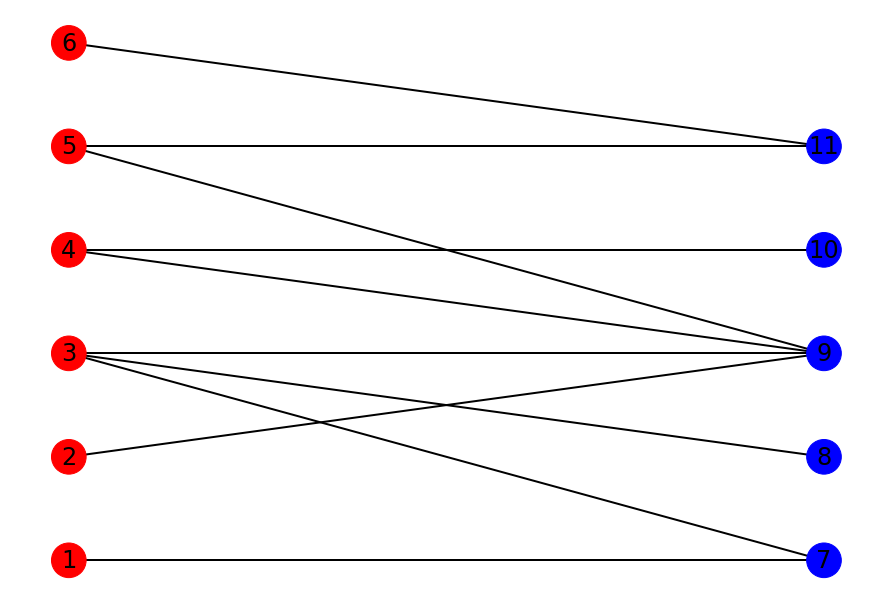

In [26]:
nx.draw(B, pos=positions, with_labels=True, node_color=['red']*len(bottom_nodes) +
        ['blue']*len(top_nodes))

We can project on the bottom or top nodes.

- How are the projected graphs related to the original bipartite graph?

In [27]:
G_top = bipartite.projected_graph(B, top_nodes)
G_bottom = bipartite.projected_graph(B, bottom_nodes)
print(G_top.edges())
print(G_bottom.edges())

[(7, 8), (7, 9), (8, 9), (9, 10), (9, 11)]
[(1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5), (5, 6)]


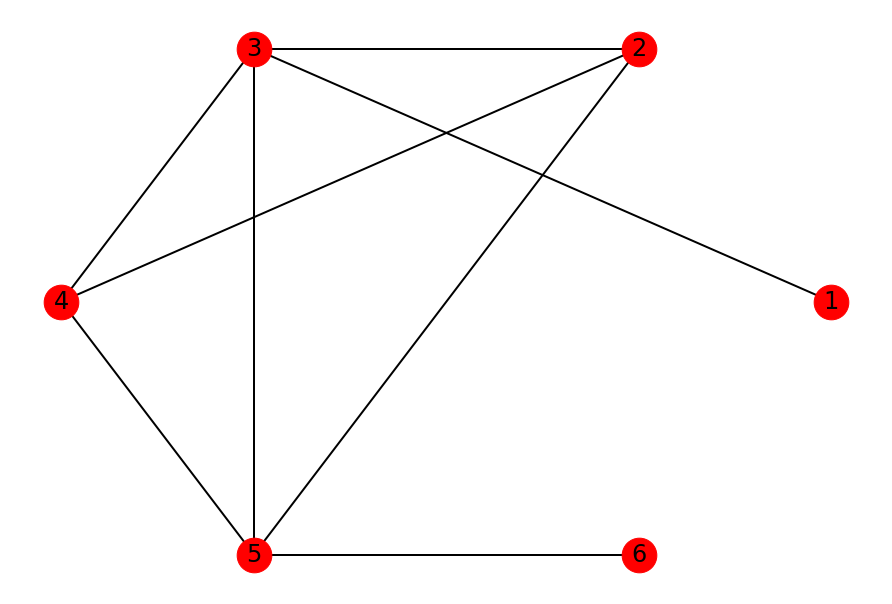

In [28]:
nx.draw_circular(G_bottom, with_labels=True)

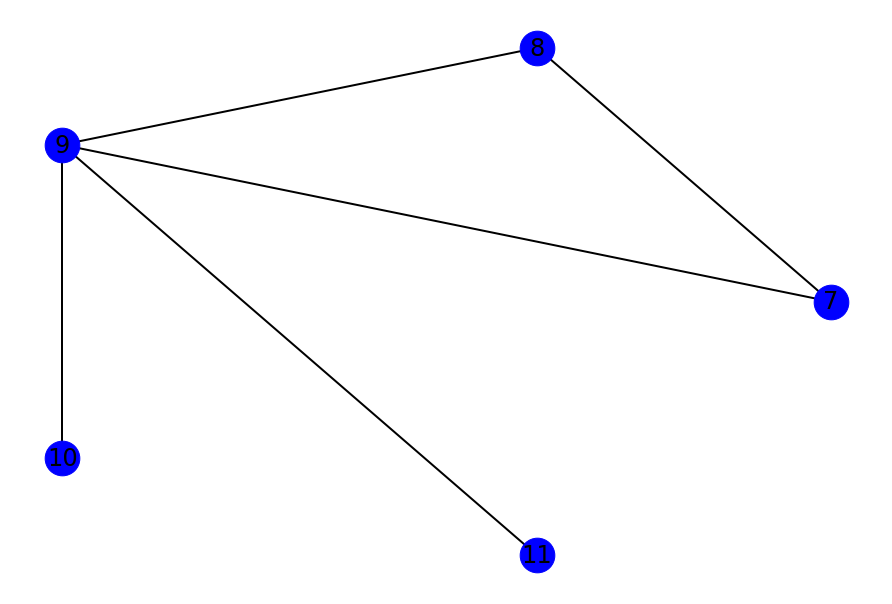

In [29]:
nx.draw_circular(G_top, with_labels=True, node_color='blue')

Due to the bipartite nature of the graph, the adjacency matrix has entries only in the upper right and lower left block. 
The projection on the two sets can be obtained by taking the matrix product of the adjacency matrix $A$ with its transpose and restricting the index range. 

In [30]:
print("Adjacency matrix of the bipartite graph:")
print(nx.adjacency_matrix(B).todense())

Adjacency matrix of the bipartite graph:
[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


In [31]:
print("Adjacency matrix of the bipartite graph projected on group 0:")
print(nx.adjacency_matrix(B).dot(nx.adjacency_matrix(B)).todense()[:6, :6])

Adjacency matrix of the bipartite graph projected on group 0:
[[1 0 1 0 0 0]
 [0 1 1 1 1 0]
 [1 1 3 1 1 0]
 [0 1 1 2 1 0]
 [0 1 1 1 2 1]
 [0 0 0 0 1 1]]


In [32]:
print("Adjacency matrix of the bipartite graph projected on group 1:")
print(nx.adjacency_matrix(B).dot(nx.adjacency_matrix(B)).todense()[6:, 6:])

Adjacency matrix of the bipartite graph projected on group 1:
[[2 1 1 0 0]
 [1 1 1 0 0]
 [1 1 4 1 1]
 [0 0 1 1 0]
 [0 0 1 0 2]]


In [33]:
print("Degree list:\n", nx.degree(B))

Degree list:
 [(1, 1), (2, 1), (3, 3), (4, 2), (5, 2), (6, 1), (7, 2), (8, 1), (9, 4), (10, 1), (11, 2)]


In [34]:
print("Degree list bottom nodes:")
dict(nx.degree(G_bottom))

Degree list bottom nodes:


{1: 1, 2: 3, 3: 4, 4: 3, 5: 4, 6: 1}

In [35]:
print("Degree list top nodes:")
dict(nx.degree(G_top))

Degree list top nodes:


{7: 2, 8: 2, 9: 4, 10: 1, 11: 1}

<a id="connected-components"></a>
## Connected Components

A graph can consist of several subgraphs which are not linked to each other. These subgraphs are called the connected components.

To illustrate this situation, we generate a test graph with two components (i.e. disconnected parts).

Note that in this example we show how to define a graph by reading in an edge list.

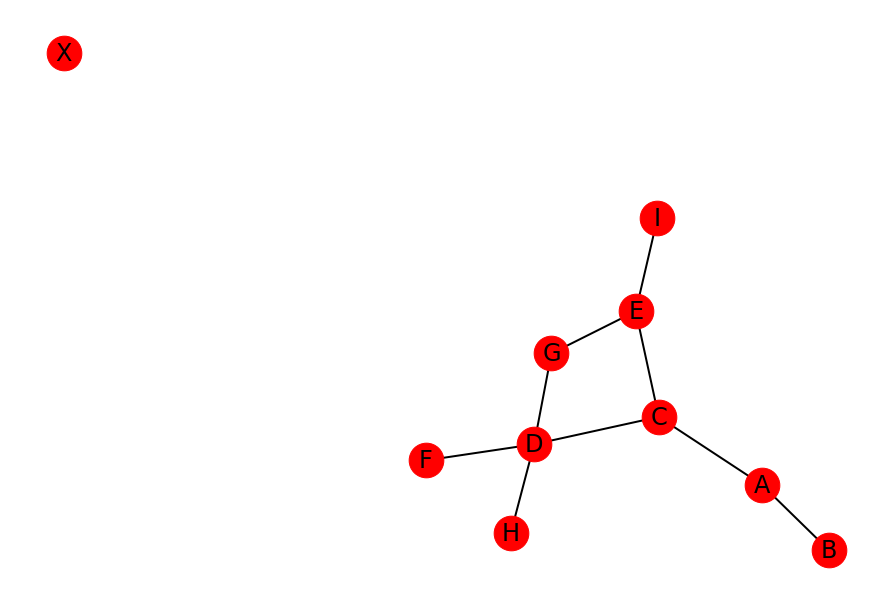

In [36]:
# Generating the test graph with two components
# First component
G_test = nx.Graph()
G_test.add_edges_from([('A', 'B'), ('A', 'C'), ('C', 'D'), ('C', 'E'),
                       ('D', 'F'), ('D', 'H'), ('D', 'G'), ('E', 'G'),
                       ('E', 'I')])
# Second component
G_test.add_node('X')
nx.draw(G_test, with_labels=True)

We can extract the various connected components from a graph. Here we are interested in the largest of these connected components. We will call it the *giant component* (we will not define that more precisely here).

In [37]:
def giant_component_size(G):
    '''Take a grah G and Return the largest connected component, 
        a list of the connected components and 
        the number of connected components'''
    components = [(len(G), list(G)) for G in nx.connected_components(G)]
    num_components = len(components)
    GCC = [y[1] for y in components if y[0]
           == max([x[0] for x in components])][0]
    return GCC, components, num_components

In [38]:
GCC, components, n = giant_component_size(G_test)

In [39]:
print("Components:\n", components)
print("Number of components:\n", n)
print("Giant Connected Component:\n", GCC)

Components:
 [(9, ['D', 'B', 'C', 'F', 'I', 'E', 'A', 'H', 'G']), (1, ['X'])]
Number of components:
 2
Giant Connected Component:
 ['D', 'B', 'C', 'F', 'I', 'E', 'A', 'H', 'G']


In [40]:
[nx.info(G).split('\n')+list(G.nodes())
 for G in nx.connected_component_subgraphs(G_test)]

[['Name: ',
  'Type: Graph',
  'Number of nodes: 9',
  'Number of edges: 9',
  'Average degree:   2.0000',
  'A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'H',
  'G',
  'I'],
 ['Name: ',
  'Type: Graph',
  'Number of nodes: 1',
  'Number of edges: 0',
  'Average degree:   0.0000',
  'X']]

<a id="centrality"></a>
## Centrality Measures

<a id="betweenness"></a>
### Betweenness Centrality

Often we have to identify nodes or links which have more importance for the network. Rankings of nodes or edges can be obtained with various **centrality measures**. One of them is the so-called betweenness centrality. 

In a network, one can determine the shortest path between any two nodes and count how many of these paths run through each node or link. This number gives the vertex or edge betweenness. 

Think for example of connections between any two points in London. If they are on the same side of the Thames, the shortest paths between a pair of any two points will not have many segments in common. If the points are on different sides of the Thames, one has to use one of the bridges and these will have a high betweenness.

In [41]:
G_GCC = G_test.subgraph(GCC).copy()

node_centrality = nx.betweenness_centrality(G_GCC)
edge_centrality = nx.edge_betweenness_centrality(G_GCC)

In [42]:
node_centrality

{'A': 0.25,
 'B': 0.0,
 'C': 0.5357142857142857,
 'D': 0.5178571428571428,
 'E': 0.30357142857142855,
 'F': 0.0,
 'H': 0.0,
 'G': 0.10714285714285714,
 'I': 0.0}

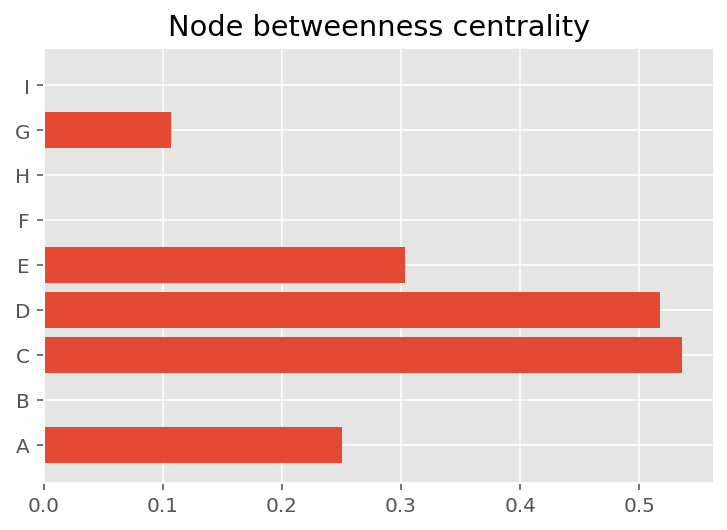

In [43]:
plt.barh(list(range(len(list(node_centrality.values())))),
         list(node_centrality.values()))
plt.yticks(list(range(len(node_centrality))), list(node_centrality.keys()))
plt.title('Node betweenness centrality')
plt.show()

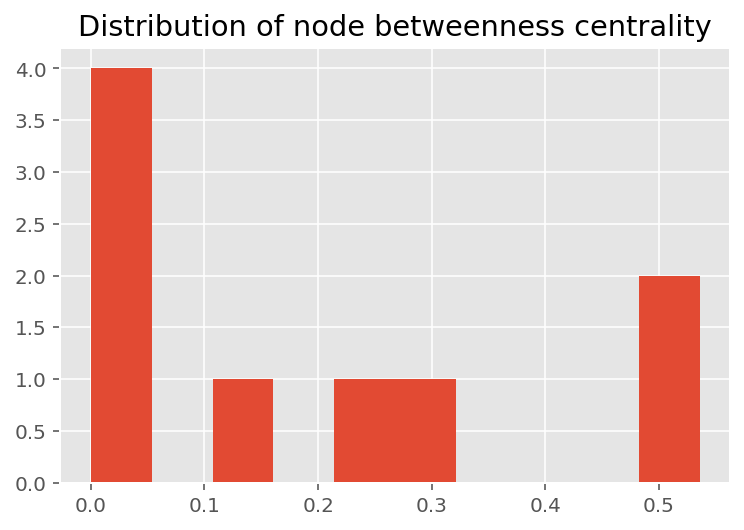

In [44]:
plt.hist(list(node_centrality.values()))
plt.title('Distribution of node betweenness centrality')
plt.show()

In [45]:
edge_centrality

{('A', 'B'): 0.2222222222222222,
 ('A', 'C'): 0.38888888888888884,
 ('C', 'D'): 0.375,
 ('C', 'E'): 0.29166666666666663,
 ('D', 'F'): 0.2222222222222222,
 ('D', 'H'): 0.2222222222222222,
 ('D', 'G'): 0.20833333333333331,
 ('E', 'G'): 0.18055555555555555,
 ('E', 'I'): 0.2222222222222222}

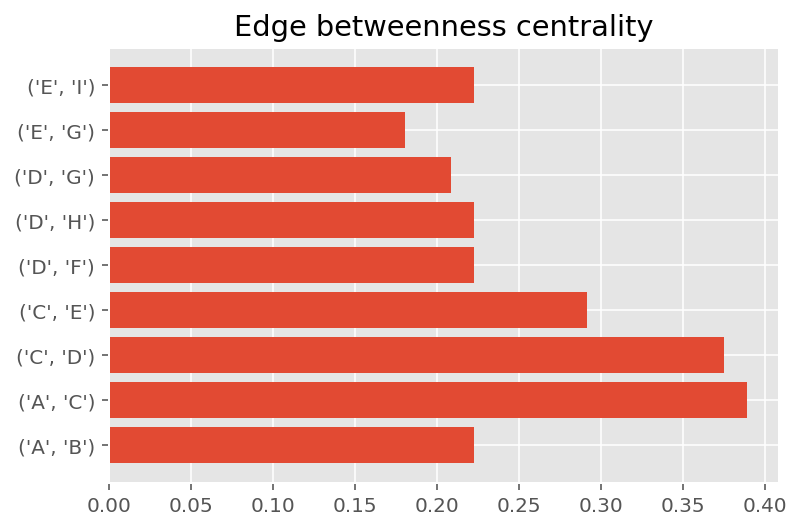

In [46]:
plt.barh(list(range(len(list(edge_centrality.values())))),
         list(edge_centrality.values()))
plt.yticks(list(range(len(edge_centrality))), list(edge_centrality.keys()))
plt.title('Edge betweenness centrality')
plt.show()

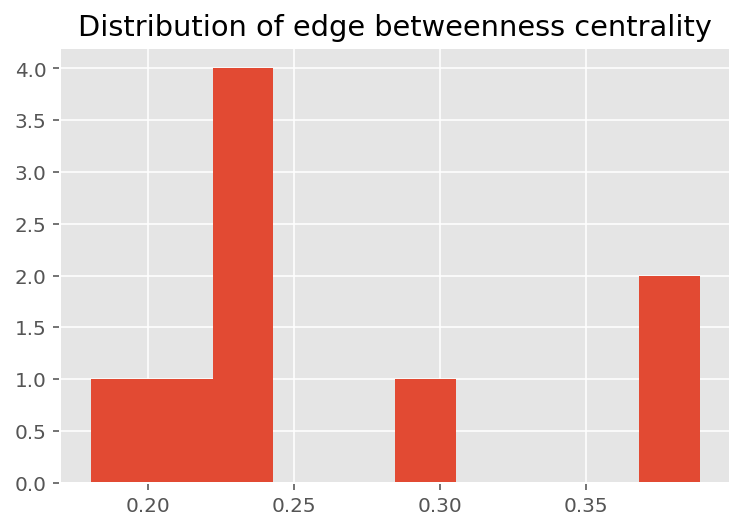

In [47]:
plt.hist(list(edge_centrality.values()))
plt.title('Distribution of edge betweenness centrality')
plt.show()

<a id="robustness"></a>
## Robustness

An interesting question in network theory is how robust a network is. That means what influence does the removal of nodes or links have on the network, if it will still work or be disrupted. We assume that a network does not work properly any more if the number of nodes in the giant component is significantly reduced (for example in one of the recent tube strikes). One can think of random failure (for example a computer in a cluster) or targeted attacks (for example by hackers).

We try first how long it takes until a network becomes disconnected by random node elimination. 
Then we will try a targeted attack.

<a id="breaking-giant-component"></a>
### Breaking the giant component

In [48]:
import copy


def breaking_graph(H, node_list):
    # define the new graph as the subgraph induced by the GCC
    n_l = copy.deepcopy(node_list)
    # continue deleting nodes from the GCC while the graph consists of a
    # single component (num_components=1)
    num_components = 1
    count = 0
    while num_components == 1:
        count += 1
        #node_to_delete = random.choice(H.nodes())
        # select at random an element in the node list or
        # select a node according to the betweenness ranking
        # (the last in the list)
        node_to_delete = n_l.pop()
        H.remove_node(node_to_delete)
        #(GCC,num_components) = giant_component_size(H)
        num_components = nx.number_connected_components(H)
    return count

<a id="breaking-randomly"></a>
### Breaking the graph randomly

In [49]:
G_GCC = G_test.subgraph(GCC).copy()

In [50]:
G_GCC.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'H', 'G', 'I'))

In [51]:
random_list = copy.deepcopy(list(G_GCC.nodes()))
np.random.shuffle(random_list)

c = breaking_graph(G_GCC, random_list)

print("num of iterations:", c)

num of iterations: 4


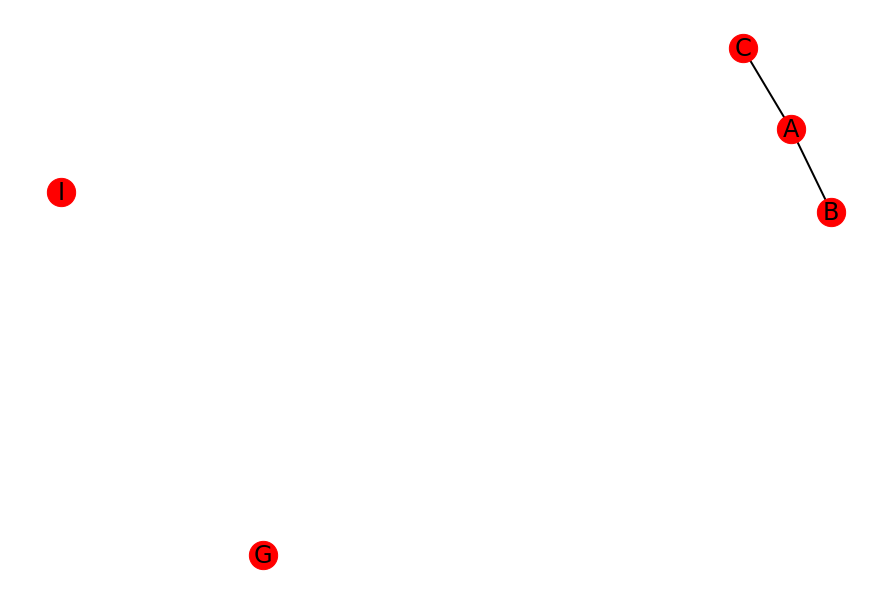

In [52]:
graphviz_pos = nx.drawing.layout.spring_layout(G_GCC)
nx.draw(G_GCC, graphviz_pos, node_size=200,
        with_labels=True)

<a id="averaging-random-breaking"></a>
### Averaging the random result

Now we use a dataset from the [cosinproject](http://www.cosinproject.eu/extra/data/internet/nlanr.html).
The chosen graph represents the Autonomous Systems topology of the Internet. Every vertex represents an autonomous system, and two vertices are connected if there is at least one physical link between the two corresponding Autonomous Systems. 

To simulate the random failure, we remove links until the giant component gets broken. We repeat that process several times to obtain an average number of link removals required.

In [53]:
data = pd.read_csv('assets/datasets/AS-19971108.dat', sep=' ', header=None)

In [54]:
data.head()

,0,1
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


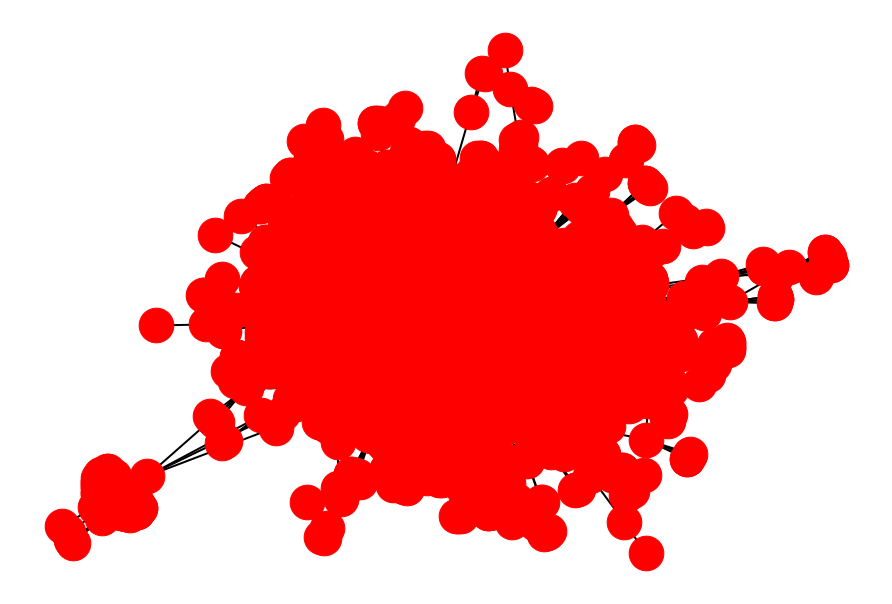

In [74]:
nx.draw(G_AS)

In [55]:
# loading the Autonomous System (AS) graph
G_AS = nx.Graph()
G_AS.add_edges_from(data.values)
print(nx.info(G_AS))

GCC, components, num_components = giant_component_size(G_AS)

Name: 
Type: Graph
Number of nodes: 3015
Number of edges: 5156
Average degree:   3.4202


In [56]:
n_iter = 1000
count = 0.0
for i in range(n_iter):
    G_GCC = G_AS.subgraph(GCC).copy()
    random_list = copy.deepcopy(list(G_GCC.nodes()))
    np.random.shuffle(random_list)
    c = breaking_graph(G_GCC, random_list)
    count += c

print("average iterations to break GCC:", count/n_iter)

average iterations to break GCC: 8.175


<a id="breaking-betweenness"></a>
### Breaking with Betweenness Centrality

To target our attack, we have to identify nodes or links which have more importance for the connectedness of the network, for example according to betweenness centrality. 

Following that logic, we will determine the node with the highest betweenness and remove it. The connectedness breaks down very fast.

In [62]:
import operator

G_GCC = G_AS.subgraph(GCC).copy()

node_centrality = nx.betweenness_centrality(G_GCC)

sorted_bc = sorted(list(node_centrality.items()), 
                   key=operator.itemgetter(1))

# selecting the ranked node list
node_ranking = [item[0] for item in sorted_bc]

c = breaking_graph(G_GCC, node_ranking)

print("num of iterations:", c)

num of iterations: 1


In [63]:
n_iter = 1000
count = 0.0
for i in range(n_iter):
    G_GCC = G_AS.subgraph(GCC).copy()
    c = breaking_graph(G_GCC, node_ranking)
    count += c

print("average iterations to break GCC:", count/n_iter)

average iterations to break GCC: 1.0


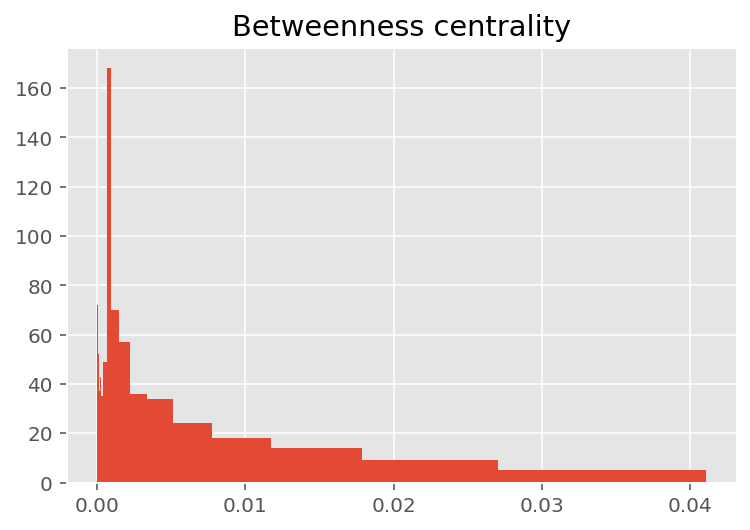

In [64]:
plt.hist(list(node_centrality.values()),
         bins=np.logspace(-3*np.log(5), -1*np.log(4), 20))
plt.title('Betweenness centrality')
plt.show()

<a id="community-detection"></a>
## Community detection

One of the central problems in network theory is community detection, identifying groups of nodes which are more closely related to each other than to other nodes in the network. There are different methods for detecting such communities. 
For an expert overview see Santo Fortunato's [review](https://arxiv.org/abs/0906.0612) or his [blog](http://digitalinterface.blogspot.co.uk/2013/05/community-detection-in-graphs.html) for a more gentle introduction.

<a id="Girvan-Newman"></a>
## The Girvan-Newman algorithm 


One of these methods is given by the Girvan-Newman algorithm and is based on the edge betweenness. One starts with a connected network and removes the edge with the highest betweenness obtaining a new network with one edge less. One calculates again the betweenness for all edges (by the edge removal it has changed), removes the one with the highest betweenness and so on. The network will split into more and more disconnected components until either the desired number of disconnected components, i.e. communities, is reached or all edges have been removed.

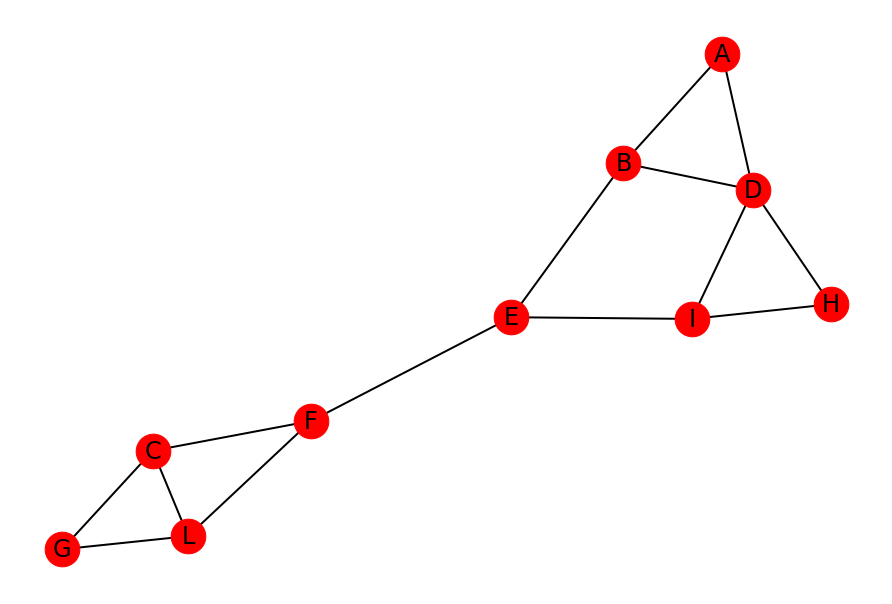

In [65]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'D'), ('B', 'D'), ('B', 'E'), ('E', 'I'),
                  ('D', 'I'), ('D', 'H'), ('H', 'I'), ('E', 'F'), ('F', 'C'),
                  ('F', 'L'), ('C', 'L'), ('C', 'G'), ('G', 'L')])

pos = nx.drawing.spring_layout(G)

nx.draw(G, pos, with_labels=True)
plt.show()

In [66]:
def Girvan_Newman(G_1):
    G = G_1.copy()
    pos = nx.drawing.spring_layout(G)
    sorted_bc = [1]
    actual_number_components = 1
    while not sorted_bc == []:
        d_edge = nx.edge_betweenness_centrality(G)
        sorted_bc = sorted(list(d_edge.items()), key=operator.itemgetter(1))
        e = sorted_bc.pop()
        print("deleting edge:", e[0], end=' ')
        G.remove_edge(*e[0])
        num_comp = nx.number_connected_components(G)
        print("...we have now ", num_comp, " components")
        if num_comp > actual_number_components:
            actual_number_components = num_comp
            if num_comp < 7:
                nx.draw(G, pos, with_labels=True)
                plt.show()

deleting edge: ('E', 'F') ...we have now  2  components


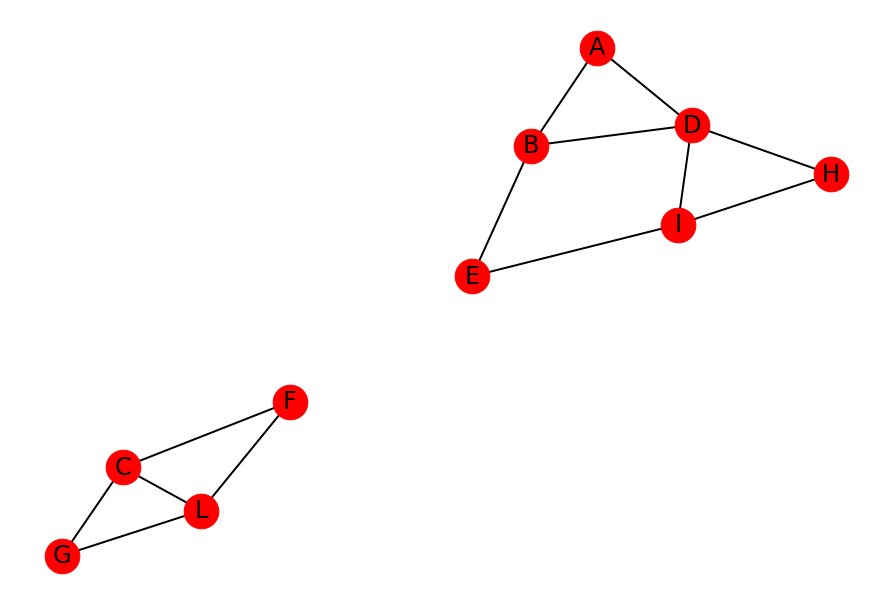

deleting edge: ('E', 'I') ...we have now  2  components
deleting edge: ('B', 'D') ...we have now  2  components
deleting edge: ('A', 'D') ...we have now  3  components


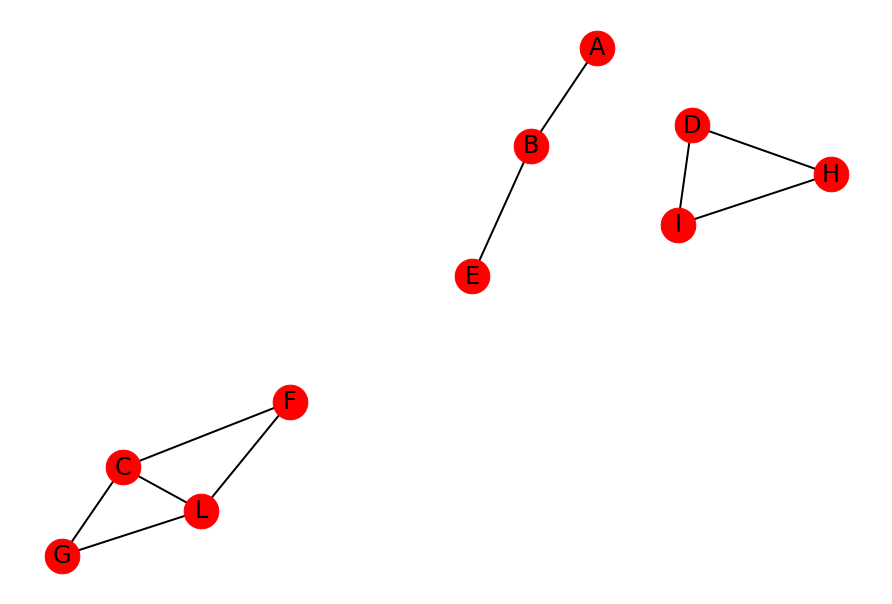

deleting edge: ('B', 'E') ...we have now  4  components


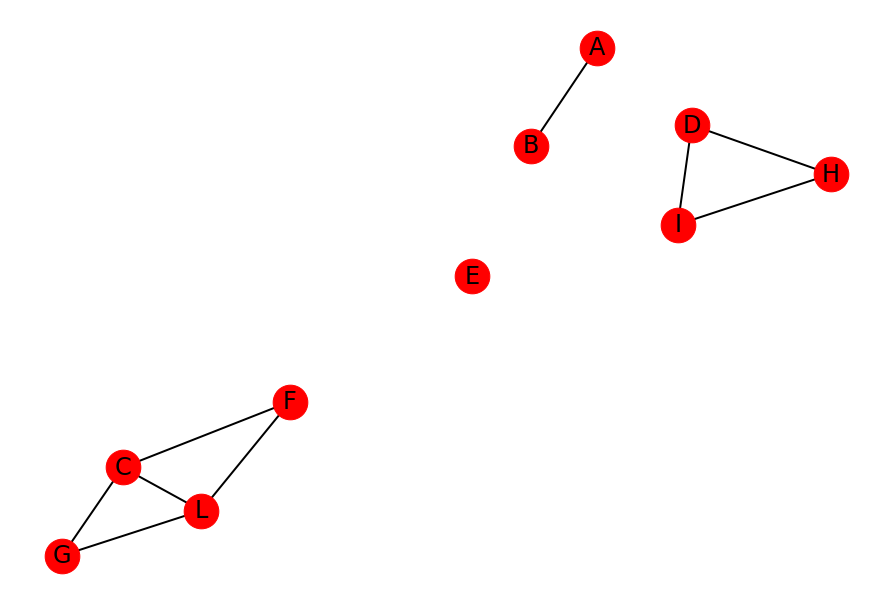

deleting edge: ('L', 'G') ...we have now  4  components
deleting edge: ('C', 'G') ...we have now  5  components


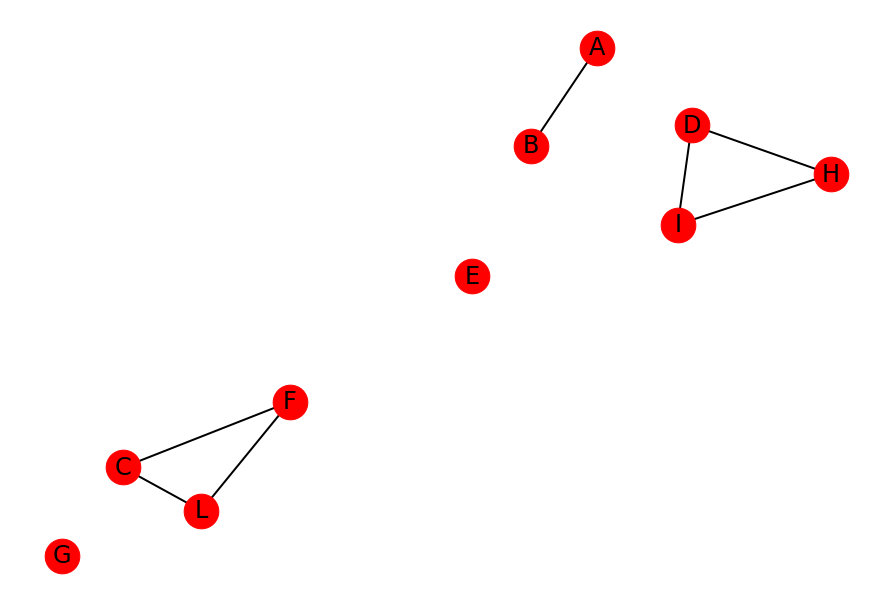

deleting edge: ('C', 'L') ...we have now  5  components
deleting edge: ('F', 'L') ...we have now  6  components


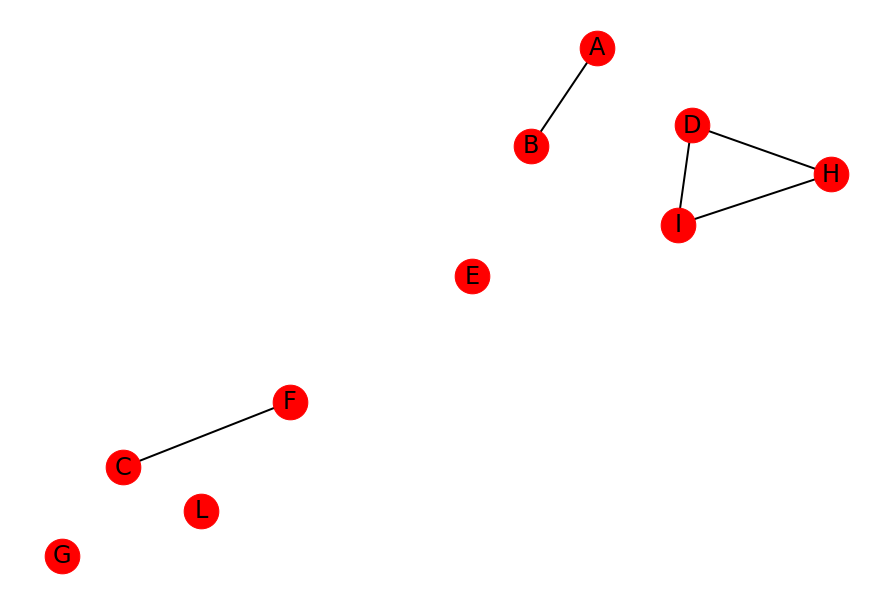

deleting edge: ('F', 'C') ...we have now  7  components
deleting edge: ('I', 'H') ...we have now  7  components
deleting edge: ('D', 'H') ...we have now  8  components
deleting edge: ('D', 'I') ...we have now  9  components
deleting edge: ('A', 'B') ...we have now  10  components


In [67]:
Girvan_Newman(G)

The same result can be obtained in the following way:

In [68]:
list(nx.community.girvan_newman(G))

[({'A', 'B', 'D', 'E', 'H', 'I'}, {'C', 'F', 'G', 'L'}),
 ({'A', 'B', 'E'}, {'D', 'H', 'I'}, {'C', 'F', 'G', 'L'}),
 ({'A'}, {'B', 'E'}, {'D', 'H', 'I'}, {'C', 'F', 'G', 'L'}),
 ({'A'}, {'B', 'E'}, {'D', 'H', 'I'}, {'F'}, {'C', 'G', 'L'}),
 ({'A'}, {'B'}, {'D', 'H', 'I'}, {'E'}, {'F'}, {'C', 'G', 'L'}),
 ({'A'}, {'B'}, {'D'}, {'E'}, {'H', 'I'}, {'F'}, {'C', 'G', 'L'}),
 ({'A'}, {'B'}, {'D'}, {'E'}, {'I'}, {'H'}, {'F'}, {'C', 'G', 'L'}),
 ({'A'}, {'B'}, {'D'}, {'E'}, {'I'}, {'H'}, {'F'}, {'C'}, {'G', 'L'}),
 ({'A'}, {'B'}, {'D'}, {'E'}, {'I'}, {'H'}, {'F'}, {'C'}, {'L'}, {'G'})]

<a id="hierarchical-clustering"></a>
## Hierarchical clustering

The method of (agglomerative) hierarchical clustering we already met before. For networks it is based on the adjacency matrix from which we can calculate the distance matrix by defining some similarity measure between the nodes. For example one can use **cosine similarity** which one can calculate for each pair of row vector $x$ and column vector $y$ of the adjacency matrix obtaining 

$$\sigma_{ij} = \frac{x\cdot y}{\|x\|\|y\|}$$

($\|\cdot\|$ indicates taking the norm of the corresponding vector, here the Euclidean length)
with the intuitive interpretation that the cosine similarity is high if two nodes share a large number of common neighbours. The name results from the fact that the calculated number gives the cosine of the angle between the two vectors $x$ and $y$.

In the end we obtain a dendrogram. Cutting it at different heights we obtain different numbers of communities.

**Note:** One would expect that all members of a community can be reached through other members of the community.

In [69]:
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cosine, jaccard

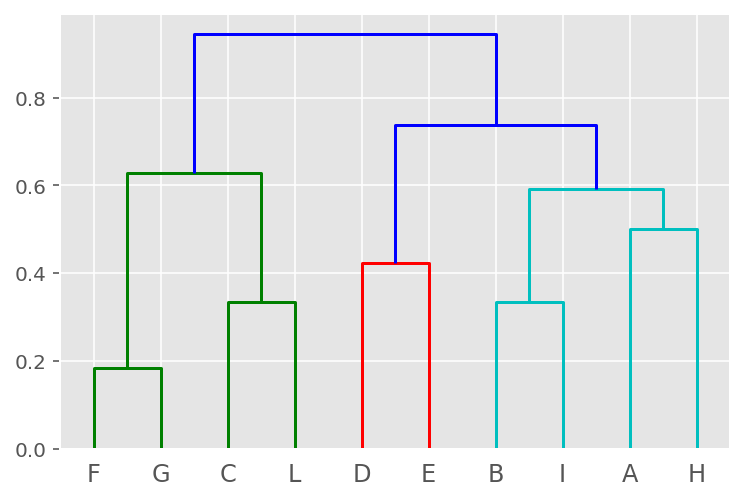

In [70]:
A = nx.adjacency_matrix(G).toarray()
dist_out = pdist(A, metric='cosine')
Z = hierarchy.linkage(dist_out, method='average')
hierarchy.dendrogram(Z, leaf_rotation=0, labels=list(G.nodes()))
plt.show()

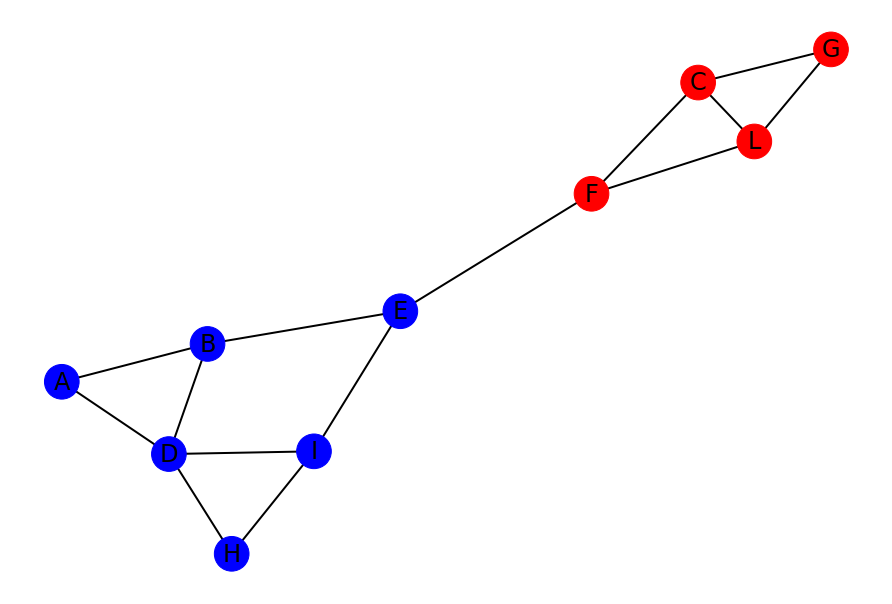

In [77]:
np.random.seed(100)
clusters = hierarchy.fcluster(Z, 2, criterion='maxclust')
dict_cluster = dict(list(zip(G.nodes(), clusters)))

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'black']
node_colors = []
for key in dict_cluster:
    for i in list(set(dict_cluster.values())):
        if dict_cluster[key] == i:
            node_colors.append(colors[i-1])

nx.draw_spring(G, node_color=node_colors, with_labels=True)

<a id="conclusions"></a>
## Conclusions

- Repeat the definition of a graph.
- Name the different types of graphs we encountered and their different characteristics.
- What are centrality measures useful for?
- What does robustness mean? What is the difference between random failure and targeted attacks?
- Describe the Girvan-Newman algorithm and hierarchical clustering.

<a id="resources"></a>
## Additional Resources

There are some very good references.
These two books present both the formalism as well as many applications and have very readable introductory parts:
* Albert-László Barabási: Network Science, Cambridge University Press, 2016 [online version](http://barabasi.com/networksciencebook/)
* Mark Newman: Networks, Oxford University Press, 2010

This book illustrates the use of networkx with applications to a range of datasets in worked out examples. Several examples in this lesson are from this book.

* Guido Caldarelli, Alessandro Chessa: Data Science and Complex Networks, Oxford University Press, 2016 (http://book.complexnetworks.net/)

A popular scientific book which is really recommandable for getting familiar with this topic is 
* Albert-László Barabási: Linked, Perseus Publishing, 2002 

Resources on community detection:
* Santo Fortunato's [review](https://arxiv.org/abs/0906.0612) or his [blog](http://digitalinterface.blogspot.co.uk/2013/05/community-detection-in-graphs.html) 

<a id="data-resources"></a>
## Network data resources
There are several sources of network datasets:
1. [Stanford Large Network Dataset Collection](https://snap.stanford.edu/data/index.html)
1. [Manlio De Domenico's collection](https://comunelab.fbk.eu/data.php)
1. [UC Irvine Network Data Repository](http://networkdata.ics.uci.edu/)
1. [University of Koblenz repository](http://konect.uni-koblenz.de/networks/)